Basic statistic arbitrage concept

共整合（cointegration）概念，兩標的行進方向相同，通常要建立平穩模型（stationary model), 使用 ADF test and ARIMA model

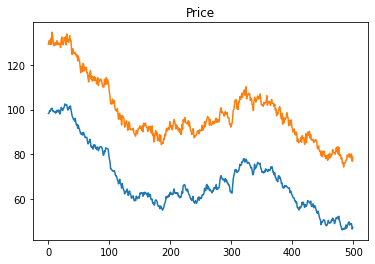

In [10]:
import numpy as np
import pandas as pd
import seaborn
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint

np.random.seed(100)
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = pd.Series(np.cumsum(x)) + 100
Y = X + y + 30
for i in range(500):
    X[i] = X[i] - i/10
    Y[i] = Y[i] - i/10

plt.title('Price')
plt.plot(pd.DataFrame({'X': X, 'Y': Y}))

the solution of X-Y is stationary


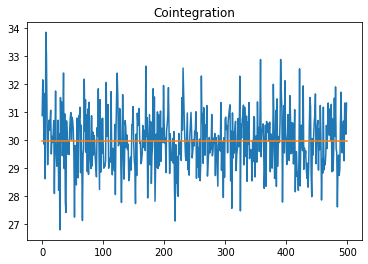

In [12]:
plt.title('Cointegration')
plt.plot(pd.DataFrame({'Y - X': Y - X, 'Mean': np.mean(Y - X)}))
print(f'the solution of X-Y is stationary')

Check for cointegrations

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader
import statsmodels.api as sm
import seaborn as sns
import pandas_datareader.data as web
import datetime as dt
import tqdm
for i in tqdm.tqdm(range(100)):

    ## define cointegration
    def find_cointegrated_pairs(dataframe):
        n = dataframe.shape[1] ## number of columns, length of dataframe
        pvalue_matrix = np.ones((n, n)) ## initialize the pvalue_martix
        keys = dataframe.keys()
        pairs = [] ## initialize the cointegrate pairs
        for i in range(n):
            for j in range(i+1, n):
                stock1 = dataframe[keys[i]]
                stock2 = dataframe[keys[j]]
                result = sm.tsa.stattools.coint(stock1, stock2)
                pvalue = result[1]
                pvalue_matrix[i, j] = pvalue
                if pvalue < 0.05:
                    pairs.append((keys[i], keys[j], pvalue))
        return pvalue_matrix, pairs

    start = dt.datetime(2017, 1, 1)
    end = dt.datetime(2022, 7, 1)
    dataframe = web.DataReader('AAPL', 'yahoo', start, end)

    find_cointegrated_pairs(dataframe)


100%|██████████| 100/100 [05:29<00:00,  3.30s/it]


In [8]:
print(dataframe)

                  High         Low        Open       Close       Volume  \
Date                                                                      
2017-01-03   29.082500   28.690001   28.950001   29.037500  115127600.0   
2017-01-04   29.127501   28.937500   28.962500   29.004999   84472400.0   
2017-01-05   29.215000   28.952499   28.980000   29.152500   88774400.0   
2017-01-06   29.540001   29.117500   29.195000   29.477501  127007600.0   
2017-01-09   29.857500   29.485001   29.487499   29.747499  134247600.0   
...                ...         ...         ...         ...          ...   
2022-06-27  143.490005  140.970001  142.699997  141.660004   70207900.0   
2022-06-28  143.419998  137.320007  142.130005  137.440002   67083400.0   
2022-06-29  140.669998  136.669998  137.460007  139.229996   66242400.0   
2022-06-30  138.369995  133.770004  137.250000  136.720001   98964500.0   
2022-07-01  139.039993  135.660004  136.039993  138.929993   71007500.0   

             Adj Close  